In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import plot_tree

In [ ]:
df = pd.read_csv('/content/heart_disease.csv')


In [ ]:
df.head(10)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,6,56,Male,Cleveland,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,7,62,Female,Cleveland,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,3
7,8,57,Female,Cleveland,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,9,63,Male,Cleveland,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,2
9,10,53,Male,Cleveland,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [ ]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [ ]:
df["num"] = df["num"].apply(lambda x: 1 if x > 0 else 0)

<Axes: ylabel='trestbps'>

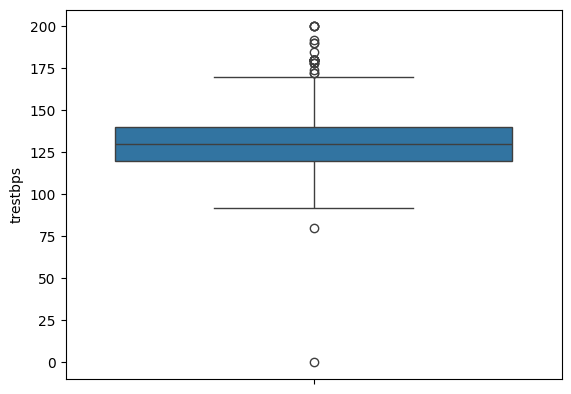

In [ ]:
sns.boxplot(df['trestbps'])

<Axes: ylabel='chol'>

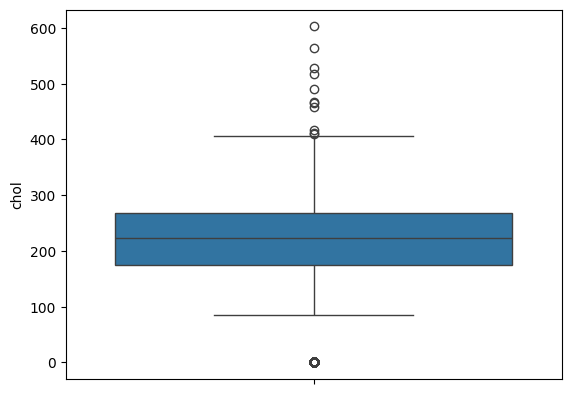

In [ ]:
sns.boxplot(df['chol'])

In [ ]:
num_features=['age','trestbps','chol','thalch','oldpeak','ca']
scaler = StandardScaler()
df[num_features] = scaler.fit_transform(df[num_features])
print(df[num_features].head())

        age  trestbps      chol    thalch   oldpeak        ca
0  1.007386  0.675287  0.305908  0.480653  1.303159 -0.724064
1  1.432034  1.462483  0.784599 -1.140262  0.569611  2.487454
2  1.432034 -0.636705  0.269780 -0.329805  1.578239  1.416948
3 -1.752828 -0.111908  0.459450  1.908602  2.403480 -0.724064
4 -1.328180 -0.111908  0.043982  1.329704  0.477918 -0.724064


Text(0, 0.5, 'Count')

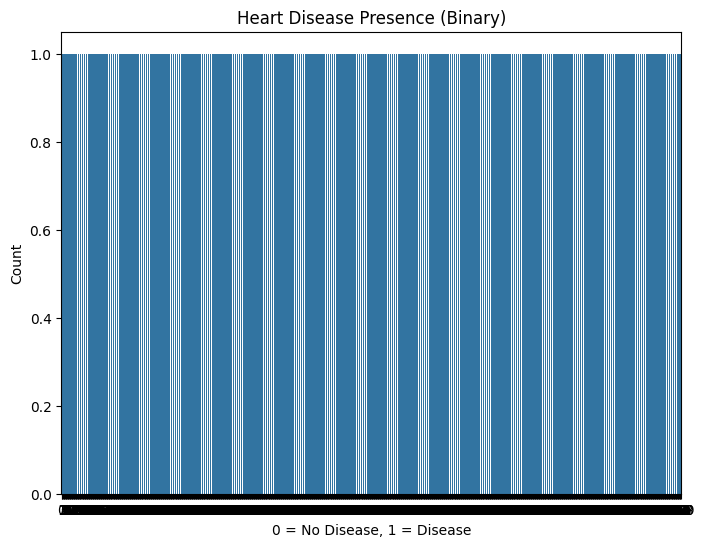

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(df['num'])
plt.title("Heart Disease Presence (Binary)")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")

<Axes: >

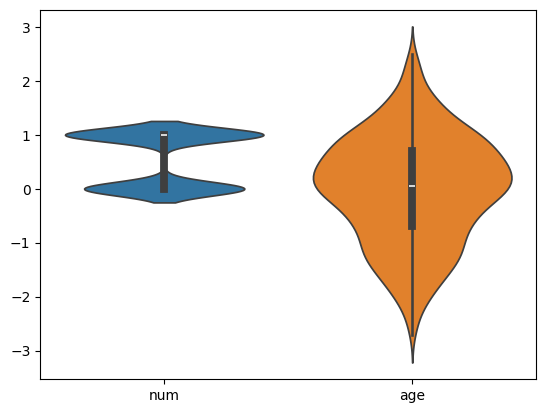

In [ ]:
sns.violinplot(df[['num', 'age']])

<Axes: >

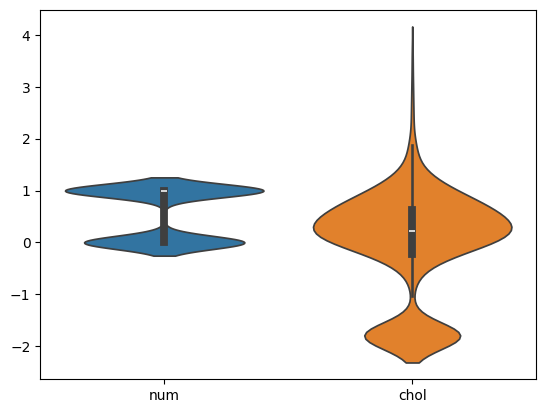

In [ ]:
sns.violinplot(df[['num', 'chol']])

<Axes: >

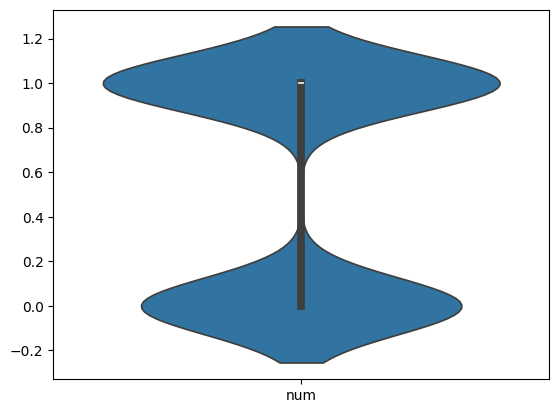

In [ ]:
sns.violinplot(df[['num', 'thal']])

<Axes: xlabel='sex', ylabel='count'>

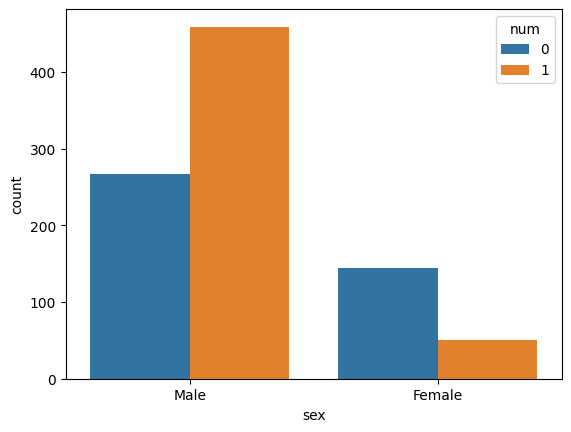

In [ ]:
sns.countplot(data = df, x = 'sex', hue = 'num')

<Axes: xlabel='cp', ylabel='count'>

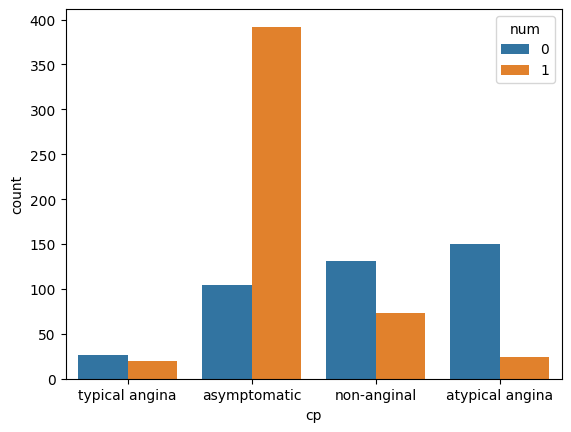

In [ ]:
sns.countplot(data = df, x = 'cp', hue = 'num')

In [ ]:
y = df['num']
x = df.drop('num', axis = 1)
x


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal
0,1,1.007386,Male,Cleveland,typical angina,0.675287,0.305908,True,lv hypertrophy,0.480653,False,1.303159,downsloping,-0.724064,fixed defect
1,2,1.432034,Male,Cleveland,asymptomatic,1.462483,0.784599,False,lv hypertrophy,-1.140262,True,0.569611,flat,2.487454,normal
2,3,1.432034,Male,Cleveland,asymptomatic,-0.636705,0.269780,False,lv hypertrophy,-0.329805,True,1.578239,flat,1.416948,reversable defect
3,4,-1.752828,Male,Cleveland,non-anginal,-0.111908,0.459450,False,normal,1.908602,False,2.403480,downsloping,-0.724064,normal
4,5,-1.328180,Female,Cleveland,atypical angina,-0.111908,0.043982,False,lv hypertrophy,1.329704,False,0.477918,upsloping,-0.724064,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,0.051927,Female,VA Long Beach,asymptomatic,-0.269347,1.209099,True,st-t abnormality,0.635026,False,-0.805791,NaN,NaN,NaN
916,917,0.901224,Male,VA Long Beach,typical angina,NaN,-0.543092,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN
917,918,0.158089,Male,VA Long Beach,asymptomatic,-0.531745,0.215589,True,st-t abnormality,-1.449008,False,-0.805791,NaN,NaN,fixed defect
918,919,0.476575,Male,VA Long Beach,asymptomatic,NaN,1.678758,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
y

,num
0,0
1,1
2,1
3,0
4,0
...,...
915,1
916,0
917,1
918,0


In [ ]:
x = pd.get_dummies(x, drop_first=True)
y = pd.get_dummies(y, drop_first=True)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 45)
X_train

,id,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,dataset_Hungary,dataset_Switzerland,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
100,101,-0.903531,-0.899103,0.549769,1.831416,-0.805791,-0.724064,True,False,False,...,False,False,False,False,False,False,False,True,True,False
466,467,0.158089,-0.636705,0.188493,-0.136839,-0.805791,NaN,True,True,False,...,True,False,False,False,False,False,False,False,False,False
197,198,-0.903531,0.307930,0.333003,0.557839,-0.622404,-0.724064,False,False,False,...,False,False,False,False,False,True,True,False,True,False
116,117,0.476575,0.412889,0.107206,1.059551,-0.805791,-0.724064,True,False,False,...,True,False,True,False,False,False,False,True,True,False
349,350,-1.328180,-0.374306,-0.136656,1.638450,-0.805791,NaN,False,True,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,608,-1.434342,-1.948697,-1.798527,0.249094,-0.805791,NaN,True,False,True,...,False,False,False,False,True,False,False,True,False,False
544,545,0.051927,-0.636705,0.342035,0.480653,0.569611,NaN,True,True,False,...,True,False,False,True,False,True,False,False,False,True
892,893,1.432034,0.412889,0.179461,-0.599957,1.028078,NaN,True,False,False,...,False,False,False,False,True,True,True,False,False,True
643,644,-0.054235,-0.111908,-1.798527,-0.098245,0.111144,NaN,True,False,True,...,False,False,False,False,False,True,True,False,False,True


In [ ]:
X_test

,id,age,trestbps,chol,thalch,oldpeak,ca,sex_Male,dataset_Hungary,dataset_Switzerland,...,cp_non-anginal,cp_typical angina,fbs_True,restecg_normal,restecg_st-t abnormality,exang_True,slope_flat,slope_upsloping,thal_normal,thal_reversable defect
692,693,0.901224,1.462483,-1.798527,-2.529618,-0.805791,NaN,True,False,True,...,True,False,False,True,False,True,True,False,True,False
260,261,-1.009693,-0.741664,0.387195,0.442060,-0.530711,0.346442,False,False,False,...,True,False,False,True,False,False,True,False,True,False
127,128,0.051927,-1.161501,0.360099,-0.445584,1.761626,0.346442,True,False,False,...,False,False,False,True,False,True,True,False,False,True
208,209,0.158089,-0.111908,0.567833,0.673619,-0.805791,-0.724064,True,False,False,...,False,False,False,True,False,False,False,True,True,False
210,211,-1.752828,-0.636705,0.143333,1.252517,-0.805791,-0.724064,False,False,False,...,True,False,False,True,False,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
266,267,-0.160397,-0.216867,0.043982,0.712212,0.111144,-0.724064,True,False,False,...,False,False,True,True,False,True,True,False,False,False
327,328,-1.752828,-0.111908,-0.046337,0.480653,-0.805791,NaN,True,True,False,...,True,False,False,True,False,False,False,False,False,False
224,225,1.007386,-1.266461,0.631056,1.213924,0.844691,1.416948,False,False,False,...,False,False,False,True,False,True,True,False,True,False
166,167,-0.160397,0.307930,0.215589,1.213924,-0.805791,NaN,True,False,False,...,True,False,False,True,False,False,False,True,True,False


In [ ]:
tree = DecisionTreeClassifier(max_depth = 6)
fitted = tree.fit(X_train, y_train)

In [ ]:
y_predict = tree.predict(X_test)

In [ ]:
y_predict

array([ True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
       False,  True, False,  True,  True,  True, False, False,  True,
       False, False,  True,  True, False,  True, False,  True,  True,
       False, False,  True,  True, False, False, False,  True, False,
        True, False,  True,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True, False,  True, False,
        True,  True,  True,  True, False, False, False,  True, False,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True, False, False, False,  True,
       False,  True,  True,  True, False,  True,  True, False, False,
        True, False, False,  True,  True,  True,  True, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True,  True,  True,  True, False, False,
        True,  True,

In [ ]:
tree2 = DecisionTreeClassifier(max_depth = 6, criterion= 'entropy')
fitted2 = tree2.fit(X_train, y_train)
y_predict2 = tree2.predict(X_test)

In [ ]:
y_predict2

array([ True,  True,  True, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True, False,  True, False, False,
       False,  True, False,  True,  True,  True, False, False,  True,
       False,  True,  True,  True, False,  True, False,  True,  True,
       False, False,  True,  True, False, False, False,  True, False,
        True, False,  True,  True, False,  True, False,  True, False,
        True, False, False, False, False,  True, False,  True, False,
        True,  True,  True,  True, False, False, False,  True, False,
        True, False,  True,  True, False,  True,  True, False,  True,
        True, False,  True,  True,  True, False, False, False,  True,
       False,  True,  True,  True, False,  True,  True,  True, False,
        True, False, False,  True,  True,  True,  True, False,  True,
       False,  True, False, False, False, False, False,  True, False,
       False,  True, False,  True,  True,  True,  True, False, False,
        True,  True,

In [ ]:
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_predict)
f1_score_gini = f1_score
print(f'F1 score for Gini = {f1_score_gini}')

F1 score for Gini = [0.77707006 0.83412322]


In [ ]:
precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_predict2)
f1_score_entropy = f1_score
print(f'F1_score for Entropy = {f1_score_entropy}')

F1_score for Entropy = [0.78980892 0.8436019 ]


In [ ]:
conf_matrix_gini = confusion_matrix(y_test, y_predict)
conf_matrix_gini

array([[61, 12],
       [23, 88]])

In [ ]:
conf_matrix_entropy = confusion_matrix(y_test, y_predict2)
conf_matrix_entropy

array([[62, 11],
       [22, 89]])

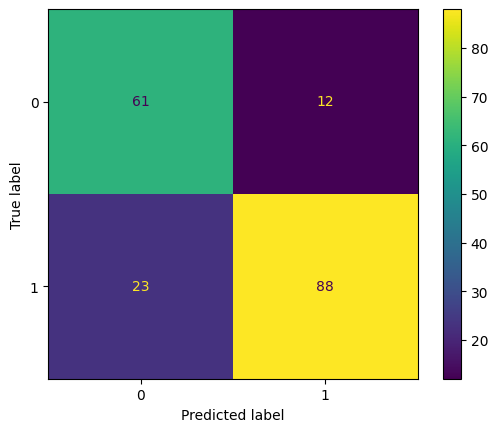

In [ ]:
disp = disp = ConfusionMatrixDisplay(confusion_matrix =conf_matrix_gini )
disp
disp.plot()

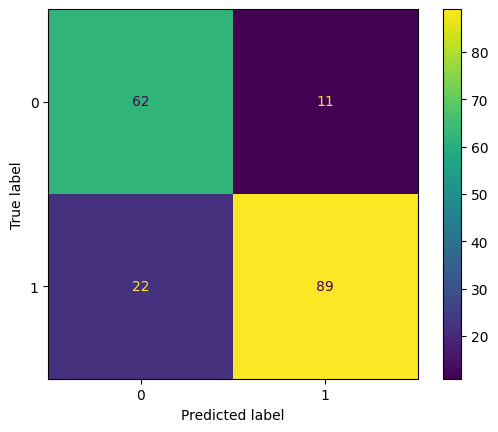

In [ ]:
disp2 = disp = ConfusionMatrixDisplay(confusion_matrix =conf_matrix_entropy )
disp2
disp2.plot()

In [ ]:
importances = tree.feature_importances_
feature_importances1 = pd.Series(importances,)

In [ ]:
importances2 = tree2.feature_importances_
feature_importances2 = pd.Series(importances2,)

<Axes: >

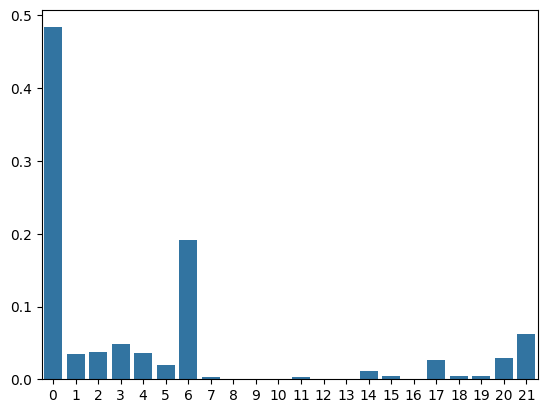

In [ ]:
sns.barplot(importances)

<Axes: >

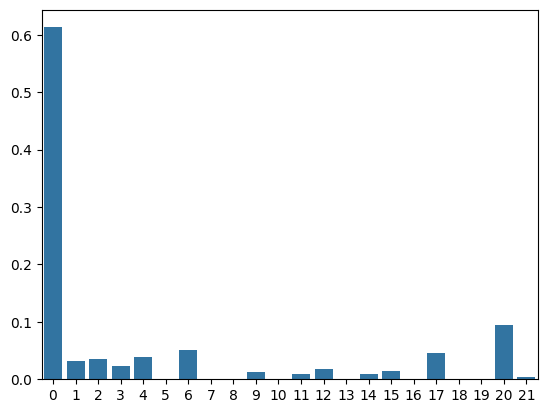

In [ ]:
sns.barplot(importances2)